# World Map Visualization on Contribution of each country to the job loss in Russia

This notebook creates a world map with color intensity based contribution of each country to the job loss in Russia. The map provides a visual representation of data associated with different countries.

## Import Required Libraries

Import libraries such as pandas, geopandas, matplotlib, and any other necessary libraries for data visualization.

In [1]:
# Import Required Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import os
os.chdir('../')
print(os.getcwd())

c:\Users\Hari\OneDrive - NTNU\Pictures\NTNU\Second Semester\TEP4222 Input Output\project1\Input-Output


## Load Data from Excel

Read the Excel file containing country names and corresponding values using pandas.

In [ ]:
# Load Data from Excel
excel_file_path = "Calculated data/Each country contribution.xlsx"  #
data = pd.read_excel(excel_file_path)

# Display the first few rows of the data
display(data.shape)

(35, 9)

In [3]:
os.chdir('../')
print(os.getcwd())

c:\Users\Hari\OneDrive - NTNU\Pictures\NTNU\Second Semester\TEP4222 Input Output\project1


## Prepare Data for Mapping

Merge the Excel data with a GeoPandas world dataset to associate values with countries.

In [4]:
# Prepare Data for Mapping
# Load the GeoPandas world dataset
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Filter the relevant columns from the Excel data
filtered_data = data[['Country', 'Change']]

# Merge the world dataset with the filtered data
merged = world.merge(filtered_data, how='left', left_on='ADMIN', right_on='Country')

# Display the first few rows of the merged dataset
print(merged.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_PL  FCLASS_GR FCLASS_IT     FCL

## Generate the World Map

Use GeoPandas and Matplotlib to plot the world map, coloring countries based on the values from the Excel file.

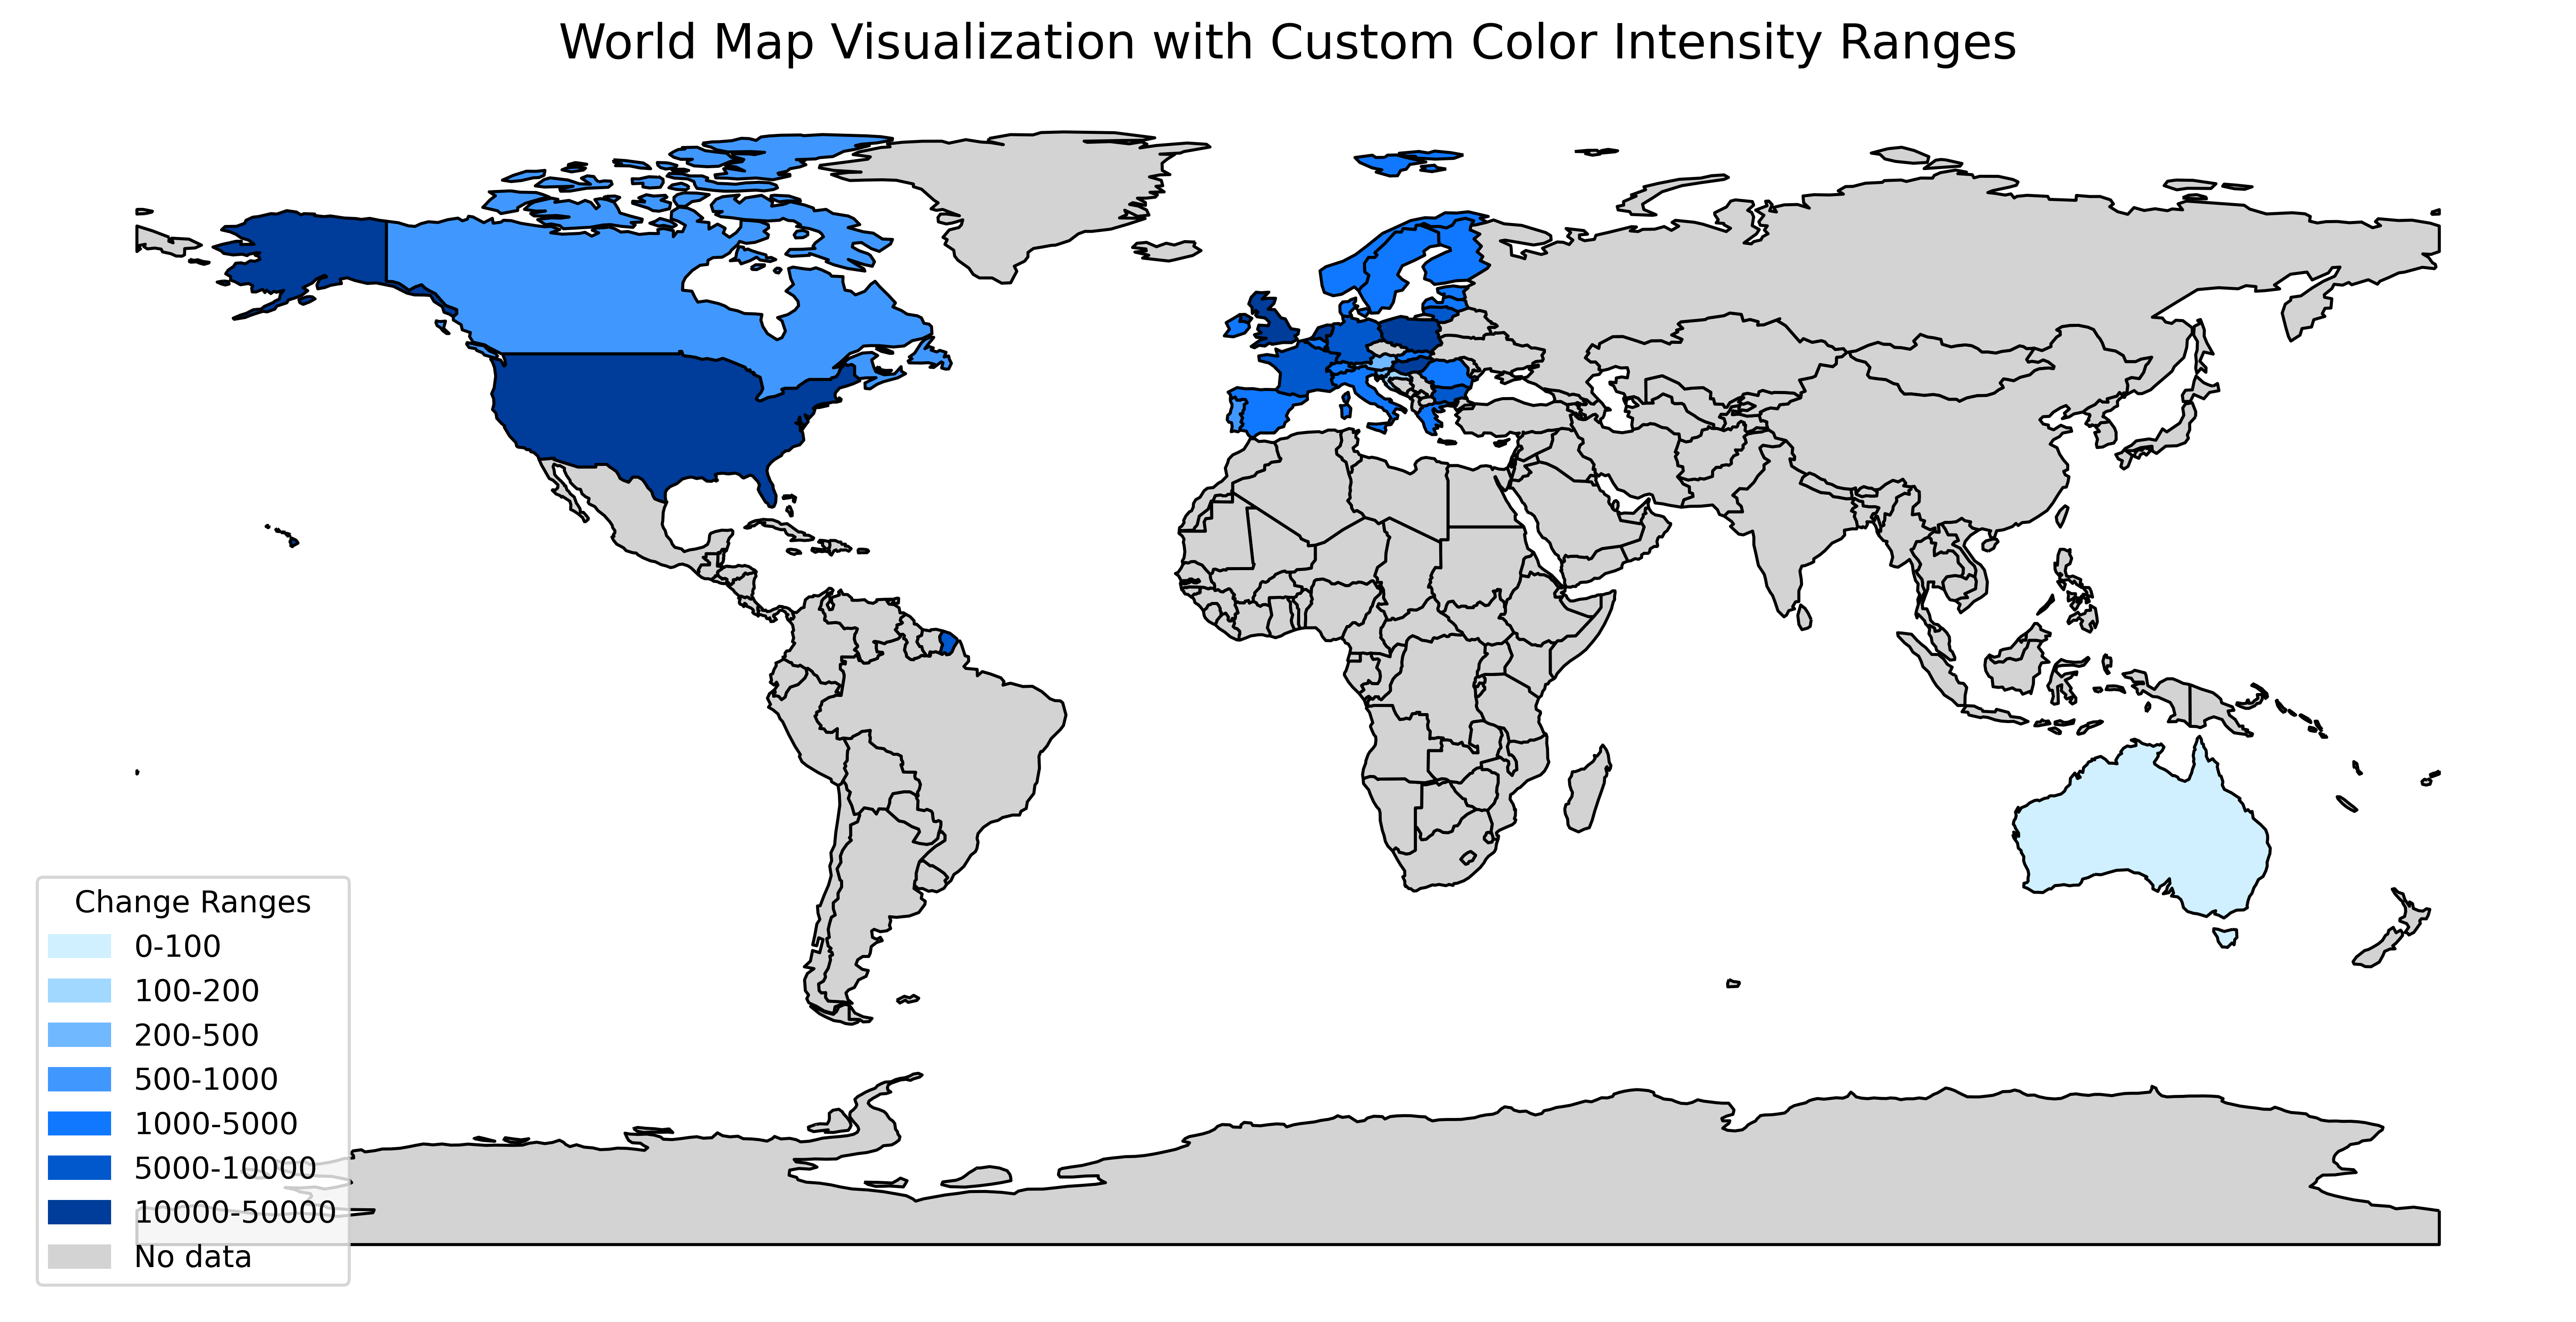

In [20]:
from matplotlib.patches import Patch

# Generate the World Map with Custom Color Intensity Ranges
# Define bins and corresponding colors
bins = [0, 100, 200, 500, 1000, 5000, 10000, 50000]
colors = ['#d0f0ff', '#a0d8ff', '#70b8ff', '#4098ff', '#1078ff', '#0058cc', '#003c99']

# Assign colors based on the bins
merged['Color'] = pd.cut(merged['Change'], bins=bins, labels=colors, include_lowest=True)

# Replace NaN values in the 'Color' column with a default color (e.g., 'lightgrey')
merged['Color'] = merged['Color'].cat.add_categories('lightgrey').fillna('lightgrey')

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=500)

# Plot the world map with the custom color intensity and decreased border thickness
merged.plot(color=merged['Color'], ax=ax, edgecolor='black', linewidth=0.3)


# Plot the world map with the custom color intensity
merged.plot(color=merged['Color'], ax=ax, edgecolor='black')

# Add a legend for the color ranges
legend_patches = [Patch(color=color, label=f'{bins[i]}-{bins[i+1]}') for i, color in enumerate(colors)]
legend_patches.append(Patch(color='lightgrey', label='No data'))
ax.legend(handles=legend_patches, title='Change Ranges', loc='lower left', fontsize=10)

# Add a title
ax.set_title('World Map Visualization with Custom Color Intensity Ranges', fontsize=16)

# Remove axis for better visualization
ax.axis('off')

# Show the plot
plt.show()

## Now a Europe focused map

Creating a map for Europe

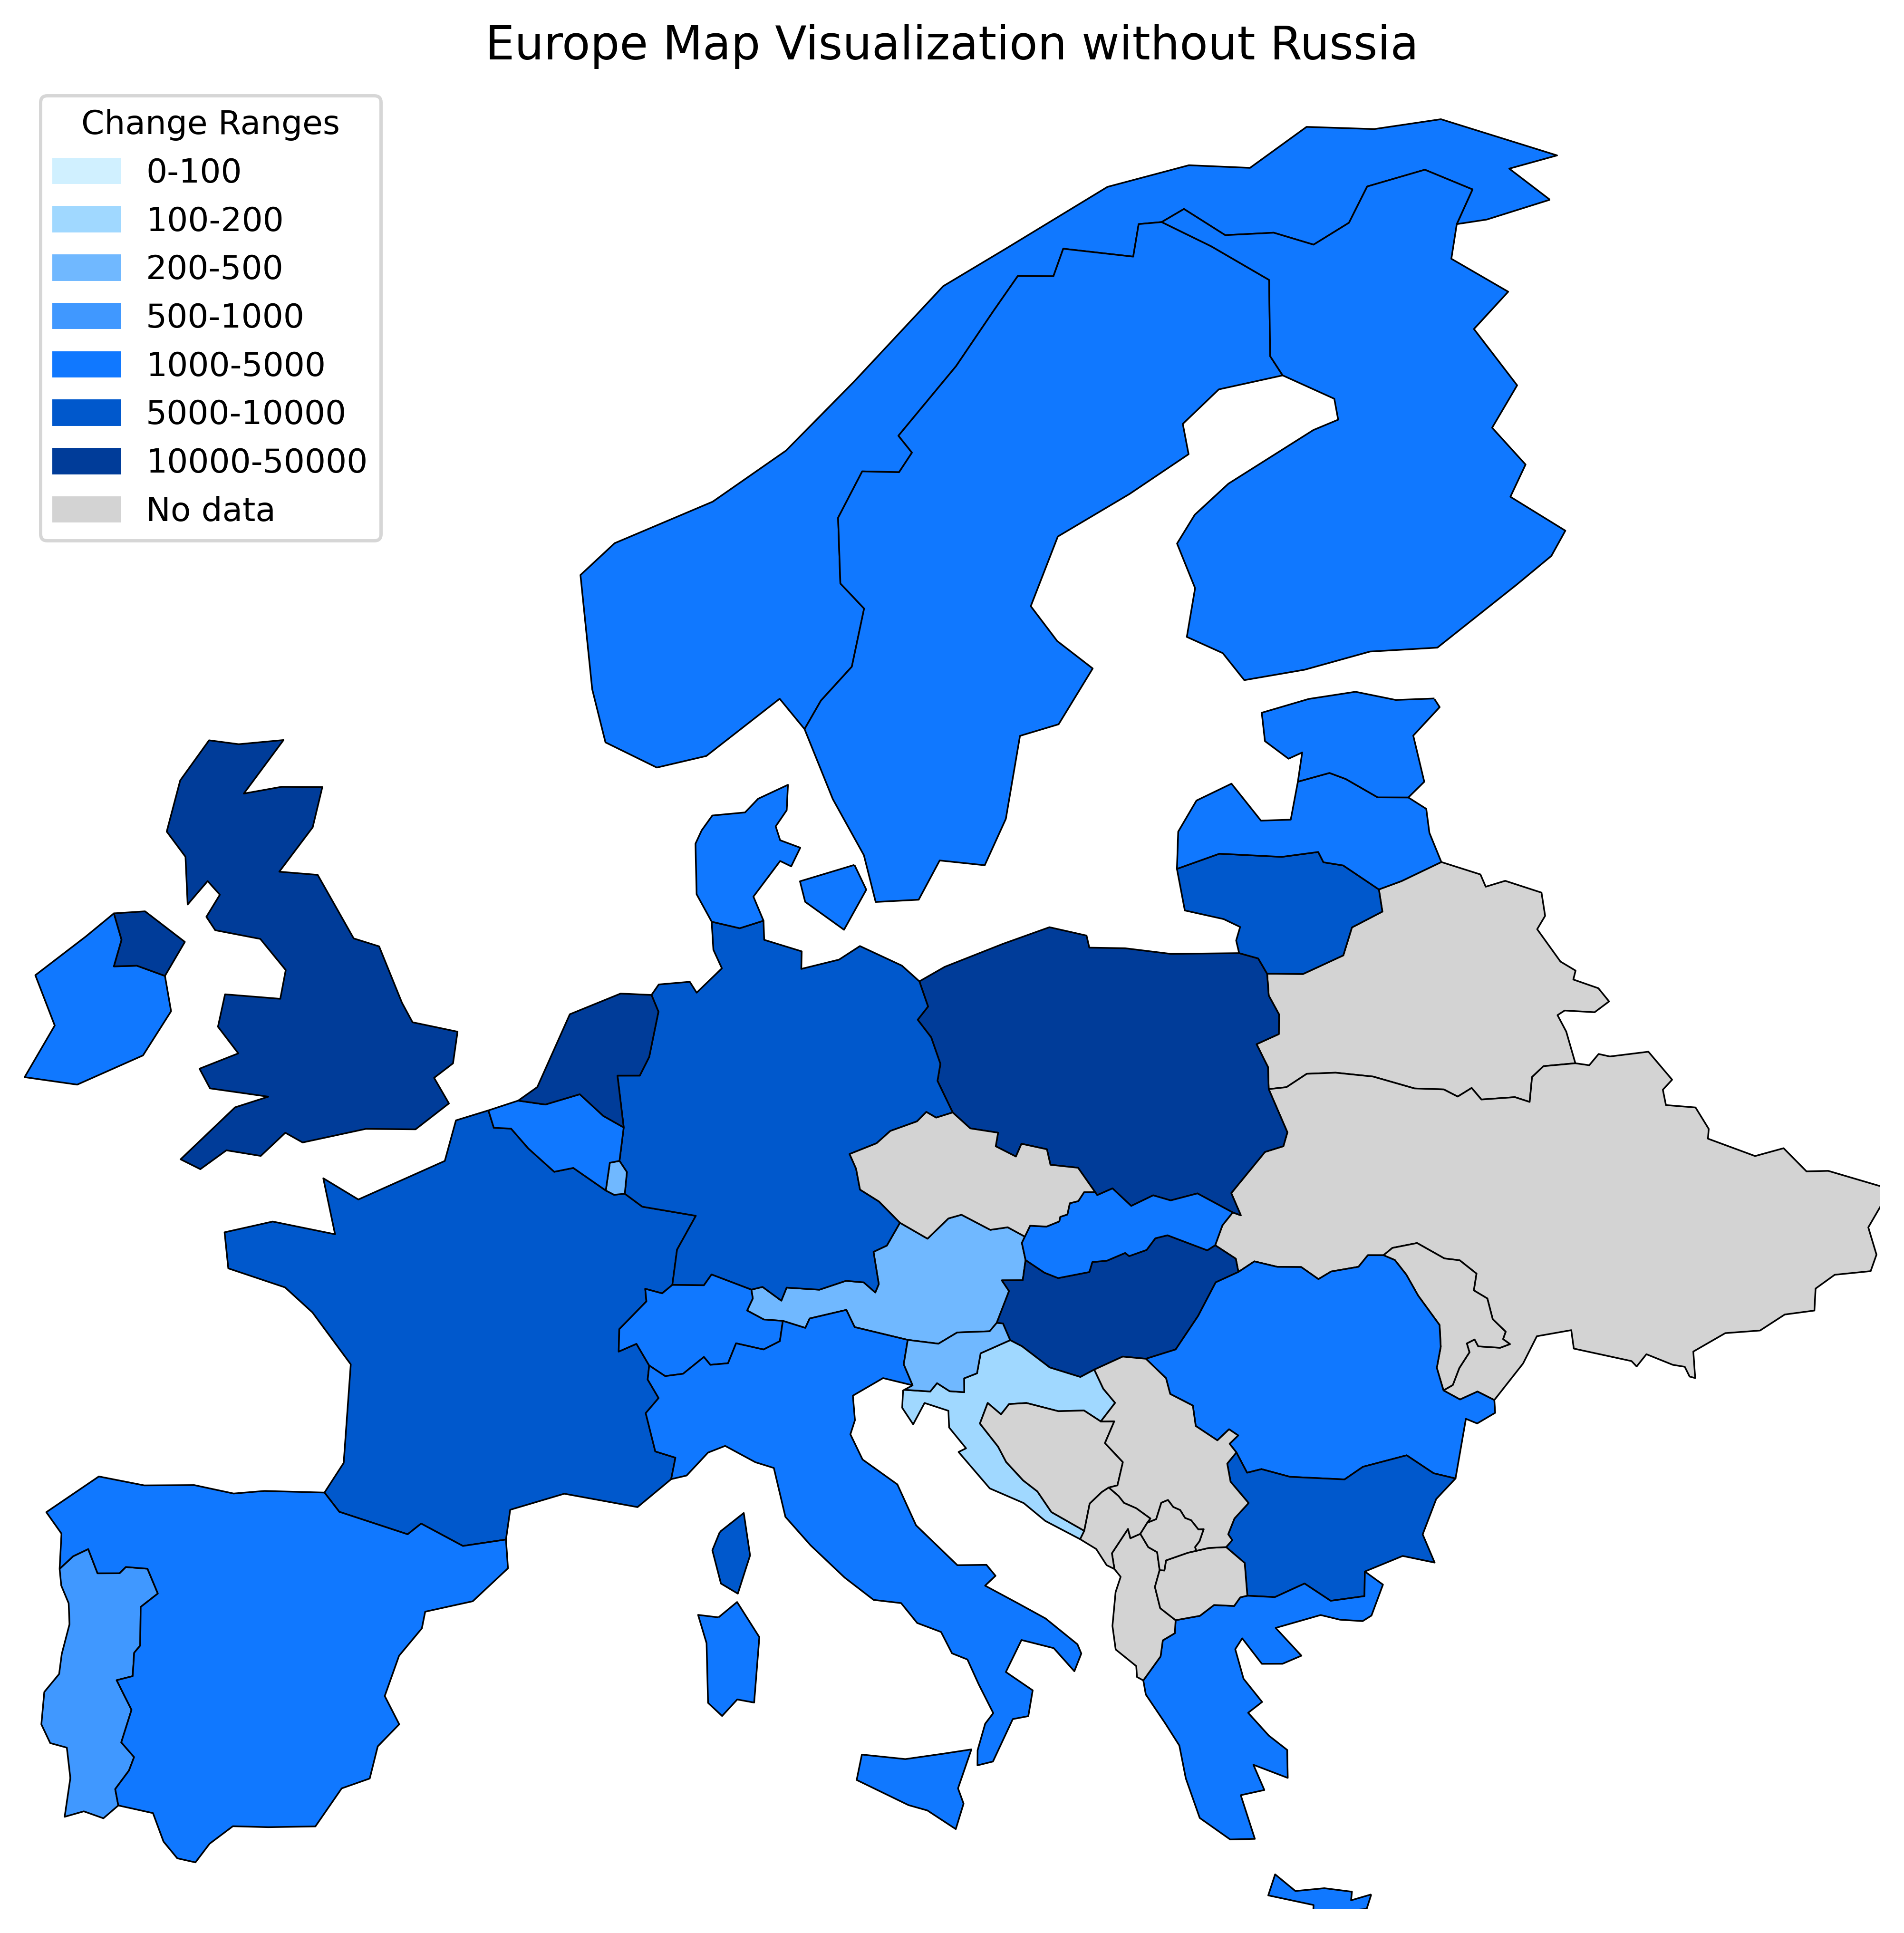

In [18]:
# Remove Russia from the Europe GeoDataFrame
europe = europe[europe['ADMIN'] != 'Russia']

# Set up the figure and axis for Europe with higher DPI for better quality
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=500)

# Plot the Europe map with the custom color intensity
europe.plot(color=europe['Color'], ax=ax, edgecolor='black', linewidth=0.5)

# Add a legend for the color ranges
legend_patches = [Patch(color=color, label=f'{bins[i]}-{bins[i+1]}') for i, color in enumerate(colors)]
legend_patches.append(Patch(color='lightgrey', label='No data'))
ax.legend(handles=legend_patches, title='Change Ranges', loc='upper left', fontsize=10)  # Increased fontsize

# Add a title
ax.set_title('Europe Map Visualization without Russia', fontsize=14)

# Zoom in by setting axis limits (adjust these values as needed)
ax.set_xlim(-10, 40)  # Longitude range
ax.set_ylim(35, 72)   # Latitude range

# Remove axis for better visualization
ax.axis('off')

# Show the plot
plt.show()